<a href="https://colab.research.google.com/github/henrychoke/Vibration_LSTM/blob/main/Vibration_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import scipy.io as sio 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
import codecs
from numpy import float32

In [2]:
path = '/content/drive/MyDrive/ML2021/h30hz0.txt'
f=open(path,"r")
lines=f.readlines()
result=[]
for x in lines:
    result.append(x.split('\t')[0])
f.close()

In [3]:
type(result)

list

In [4]:
from pandas.core.frame import DataFrame
data=DataFrame(result)
print(data)
data.shape

                   0
0       4.63671e+000
1       1.99280e+000
2      -3.76411e+000
3      -4.55871e+000
4       5.75382e-001
...              ...
88827   2.80913e+000
88828   1.19527e+001
88829   6.53028e+000
88830  -8.61446e+000
88831  -1.37773e+001

[88832 rows x 1 columns]


(88832, 1)

In [6]:
test=data[71000:len(data)]  #訓練資料及測試資料呈8：2
train=data[:len(data)-len(test)]
train_set = train
test_set = test
print(train)

                   0
0       4.63671e+000
1       1.99280e+000
2      -3.76411e+000
3      -4.55871e+000
4       5.75382e-001
...              ...
70995  -7.09850e+000
70996   3.65871e+000
70997  -1.61774e-002
70998  -4.31347e+000
70999  -2.89673e+000

[71000 rows x 1 columns]


In [7]:
from sklearn.preprocessing import MinMaxScaler 
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train_set)
print(training_set_scaled)

[[0.55419601]
 [0.52016102]
 [0.44605244]
 ...
 [0.49429949]
 [0.43898054]
 [0.4572182 ]]


In [8]:
X_train = []  #預測點前50筆資料
y_train = []  #預測點
for i in range(50,len(train_set)):
    X_train.append(training_set_scaled[i-50:i-1, 0]) 
    y_train.append(training_set_scaled[i, 0]) 
X_train, y_train = np.array(X_train), np.array(y_train) 
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [9]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout,BatchNormalization

In [10]:
keras.backend.clear_session()
regressor = Sequential()
regressor.add(LSTM(units = 100, input_shape = (X_train.shape[1], 1)))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [11]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [12]:
history = regressor.fit(X_train, y_train, epochs = 100, validation_split=0.33)
print(history.history[ 'loss' ])


Epoch 1/100
1486/1486 [==============================] - 41s 5ms/step - loss: 0.0099 - val_loss: 0.0034
Epoch 2/100
1486/1486 [==============================] - 7s 5ms/step - loss: 0.0033 - val_loss: 0.0032
Epoch 3/100
1486/1486 [==============================] - 7s 5ms/step - loss: 0.0032 - val_loss: 0.0030
Epoch 4/100
1486/1486 [==============================] - 8s 5ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 5/100
1486/1486 [==============================] - 7s 5ms/step - loss: 0.0028 - val_loss: 0.0030
Epoch 6/100
1486/1486 [==============================] - 7s 5ms/step - loss: 0.0028 - val_loss: 0.0030
Epoch 7/100
1486/1486 [==============================] - 7s 5ms/step - loss: 0.0027 - val_loss: 0.0030
Epoch 8/100
1486/1486 [==============================] - 7s 5ms/step - loss: 0.0026 - val_loss: 0.0027
Epoch 9/100
1486/1486 [==============================] - 7s 5ms/step - loss: 0.0026 - val_loss: 0.0026
Epoch 10/100
1486/1486 [==============================] - 8s 5ms/step - 

KeyError: ignored

In [14]:
#print(history.history[ 'acc' ])
print(history.history[ 'val_loss' ])
#print(history.history[ 'val_acc' ])

[0.0033810376189649105, 0.0031918080057948828, 0.0030330857262015343, 0.002853814512491226, 0.003029545769095421, 0.0029909606091678143, 0.002960669109597802, 0.0026884658727794886, 0.0026459654327481985, 0.002595135010778904, 0.0025972474832087755, 0.002538483589887619, 0.0024880976416170597, 0.0024828703608363867, 0.002431904897093773, 0.002394367940723896, 0.0022647823207080364, 0.0022124534007161856, 0.002217291621491313, 0.0021715357434004545, 0.002109701046720147, 0.0020867660641670227, 0.002205887110903859, 0.002088917186483741, 0.002037802943959832, 0.002158526098355651, 0.0019801808521151543, 0.0019567045383155346, 0.001996796578168869, 0.0019707202445715666, 0.0019212295301258564, 0.0019232305930927396, 0.0019204509444534779, 0.0018617832101881504, 0.0019300307612866163, 0.0018824992002919316, 0.0018820073455572128, 0.001829562010243535, 0.0018265830585733056, 0.0018215036252513528, 0.0018971717217937112, 0.0018064517062157393, 0.00188793137203902, 0.0018053966341540217, 0.00

Text(0.5, 1.0, 'model train vs validation loss')

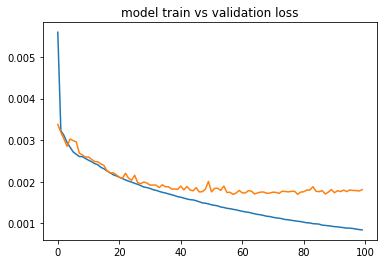

In [15]:
plt.plot(history.history[ 'loss' ])
plt.plot(history.history[ 'val_loss' ])
plt.title( 'model train vs validation loss' )

In [16]:
dataset_total = pd.concat((train, test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test) - 50:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(50, len(inputs)):
    X_test.append(inputs[i-50:i-1, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_vibration_value = regressor.predict(X_test)
predicted_vibration_value = sc.inverse_transform(predicted_vibration_value)

In [17]:

test_label=np.array(test)
test_label=test_label.astype(np.float32)
#type(test)
print(test_label)
#test_label[0]
rmse=np.sqrt(np.mean(((predicted_vibration_value- test_label)**2)))
print(rmse)

[[ -3.08466]
 [  1.82825]
 [  3.71882]
 ...
 [  6.53028]
 [ -8.61446]
 [-13.7773 ]]
3.3067632


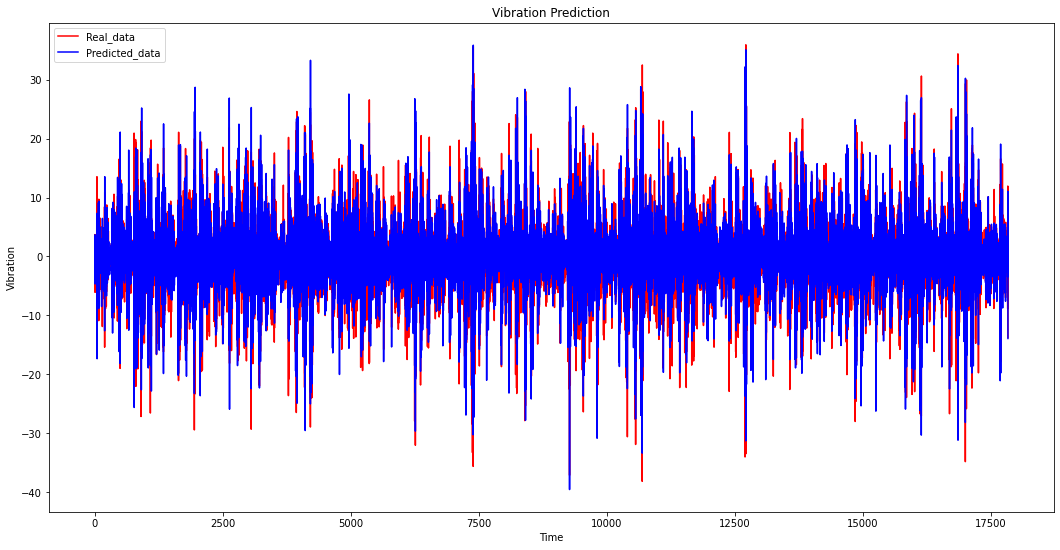

<Figure size 432x288 with 0 Axes>

In [18]:
plt.figure(figsize = (18,9))
plt.plot(test_label, color = 'red', label = 'Real_data')  # 紅線表示真實數據
plt.plot(predicted_vibration_value, color = 'blue', label = 'Predicted_data')  # 藍線表示預測數據
plt.title('Vibration Prediction')
plt.xlabel('Time')
plt.ylabel('Vibration')
plt.legend()
plt.show()
myfig = plt.gcf()
myfig.savefig('/content/drive/MyDrive/ML2021/figure.png',dpi=300)

In [20]:
regressor.save('/content/drive/MyDrive/ML2021/my_model.h5')